In [71]:
import torch
from torch import nn
import matplotlib.pyplot as plt

## Data Preparing and Loading

In [72]:
# Create parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight + X * bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.7000],
         [0.7060],
         [0.7120],
         [0.7180],
         [0.7240],
         [0.7300],
         [0.7360],
         [0.7420],
         [0.7480],
         [0.7540]]))

In [73]:
len(X), len(y)

(50, 50)

### Splitting data into training and test set

In [74]:
# Create a train test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## Visualizing data

In [75]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

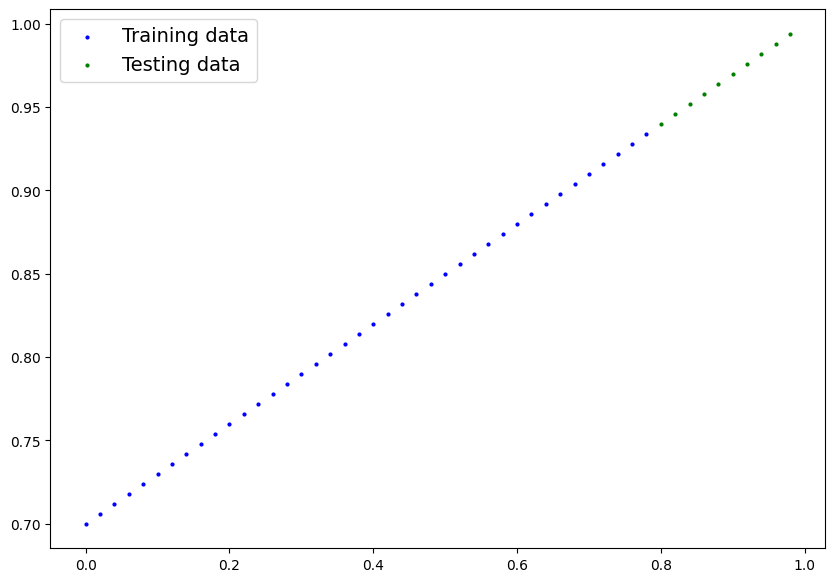

In [76]:
plot_predictions();

## Build Model

In [77]:
from torch import nn

# Create Linear Regression model Class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))

  # Forward Method to define the computation in the model
  def forward(self, X: torch.Tensor) -> torch.Tensor:
    return self.weights * X + self.bias

In [78]:
# Create a random seed
torch.manual_seed(42)

# Create a instance of model
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [79]:
# List named Parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making Prediction using `torch.inference_mode()`



In [80]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

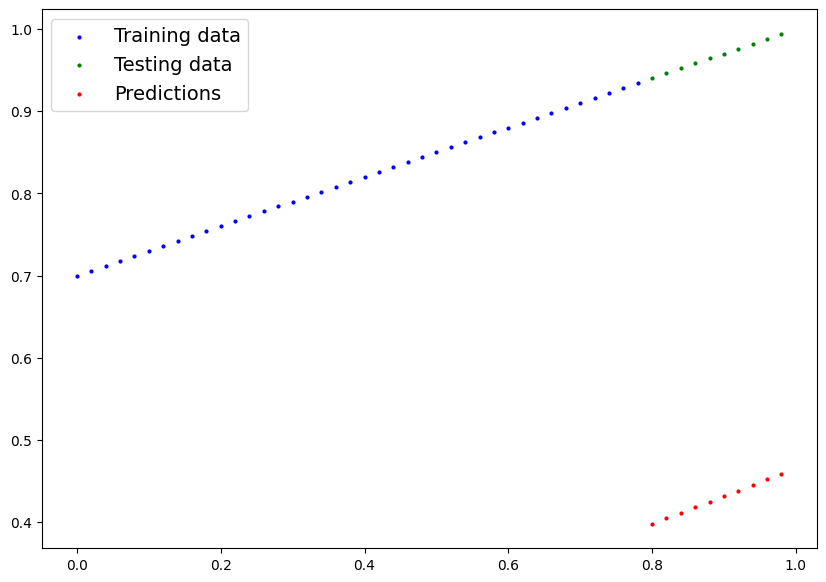

In [81]:
plot_predictions(predictions = y_preds)

## Train Model

In [82]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [83]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [84]:
# Setup loss Function
loss_fn = nn.L1Loss()

# Setup an Optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr= 0.01)

### Building Training Loop and Testing Loop

In [85]:
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  model_0.train()

  #1. Forward Pass
  y_pred = model_0(X_train)

  #2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  #3. Optimizer Zero Grad
  optimizer.zero_grad()

  #4. Perform Backpropagation on the loss
  loss.backward()

  #5. Step the optimizer
  optimizer.step()

  ## Testing
  with torch.inference_mode():
    # Forward pass
    test_pred = model_0(X_test)

    # Calculate loss
    test_loss = loss_fn(test_pred, y_test)

  # Print whats happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f'Epoch: {epoch} | Test: {loss} | Test Loss: {test_loss}')


    # Print out model state_dict()
    print(model_0.state_dict())

Epoch: 0 | Test: 0.556881308555603 | Test Loss: 0.5250651240348816
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Test: 0.44167131185531616 | Test Loss: 0.3903551697731018
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Test: 0.32646140456199646 | Test Loss: 0.2556453347206116
OrderedDict([('weights', tensor([0.4186])), ('bias', tensor([0.3388]))])
Epoch: 30 | Test: 0.21125154197216034 | Test Loss: 0.12093551456928253
OrderedDict([('weights', tensor([0.4576])), ('bias', tensor([0.4388]))])
Epoch: 40 | Test: 0.09604163467884064 | Test Loss: 0.014558094553649426
OrderedDict([('weights', tensor([0.4966])), ('bias', tensor([0.5388]))])
Epoch: 50 | Test: 0.04522073268890381 | Test Loss: 0.08176179975271225
OrderedDict([('weights', tensor([0.5073])), ('bias', tensor([0.5973]))])
Epoch: 60 | Test: 0.03982054069638252 | Test Loss: 0.08882363885641098
OrderedDict([('weights', tensor([0.4950])), ('bias', tensor([0.6153]))

In [86]:
import numpy as np

Text(0.5, 0, 'Epochs')

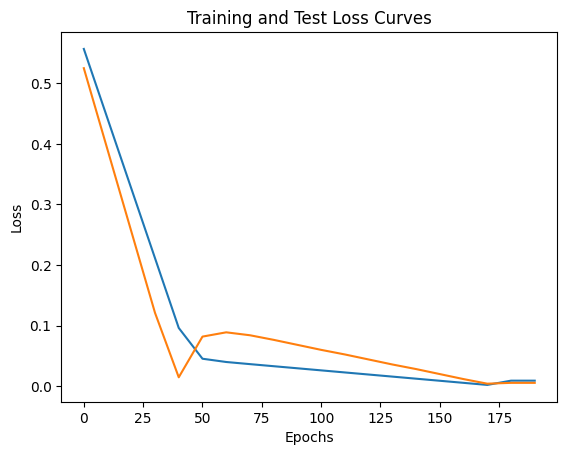

In [87]:
# Plot the loss Curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = 'Train Loss')
plt.plot(epoch_count, test_loss_values, label = 'Test Loss')
plt.title('Training and Test Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [88]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

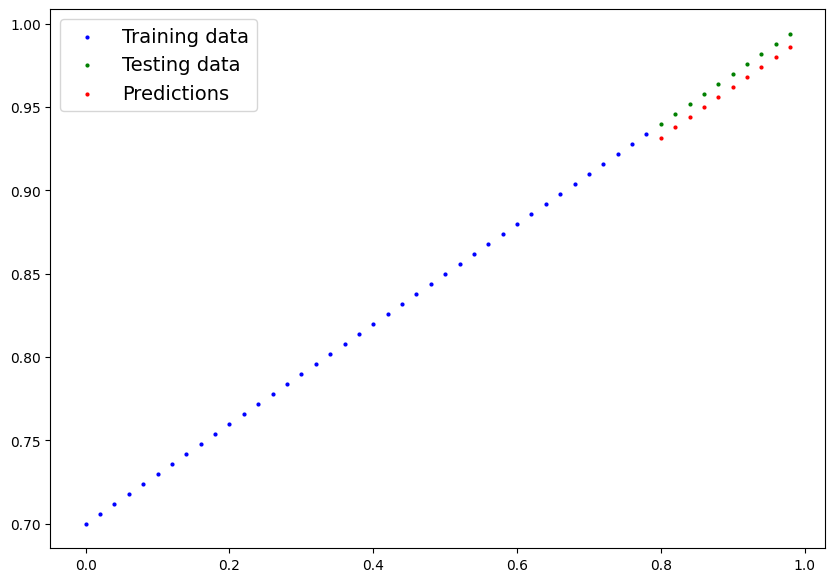

In [89]:
plot_predictions(predictions = y_preds_new);

## Saving a model in PyTorch

There are 3 main methods for saving and loading:

1. `torch.save()` - allows to save PyTorch object in python's pickle format

2. `torch.load()` - allows to load saved PyTorch object

3. `torch.nn.Module.load_state_dict()` - allows to load model's saved state dictionary

In [90]:
 # Saving our PyTorch Model
from pathlib import Path

# 1. Create model directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# 2. Create model save path
MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# 3. Save the model state dict
print(f'Saving Model to: {MODEL_SAVE_PATH}')
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH)

Saving Model to: models/01_pytorch_workflow_model_0.pth


In [91]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1207 Oct 12 17:56 01_pytorch_workflow_model_0.pth


## Loading PyTorch Model


In [92]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3018])), ('bias', tensor([0.6903]))])

In [93]:
# To load in a saved state_dict
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0
loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<All keys matched successfully>

In [94]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.3018])), ('bias', tensor([0.6903]))])

In [95]:
# Make Predictions using our loaded Model
loaded_model_0.eval()
with torch.inference_mode():
  y_preds = loaded_model_0(X_test)

y_preds

tensor([[0.9317],
        [0.9378],
        [0.9438],
        [0.9499],
        [0.9559],
        [0.9619],
        [0.9680],
        [0.9740],
        [0.9800],
        [0.9861]])

In [96]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Putting it all together

In [97]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cu118'

## Create device agnostic code

This means if we've got access to a GPU, our code will use it (for faster computing)

If no GPU is available, the code will default using CPU.

In [98]:
# Setup device Agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using Device: {device}')

Using Device: cpu


### Data

In [99]:
# Create some data using linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [100]:
# Split the data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

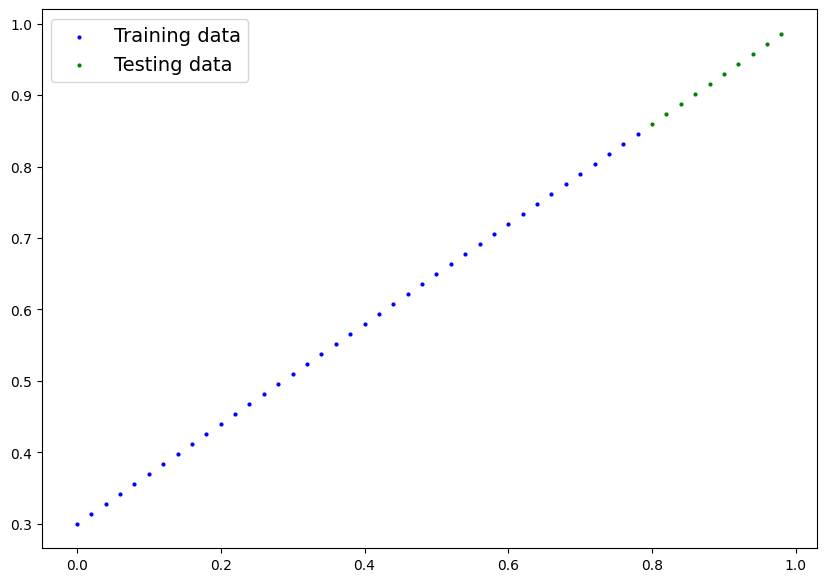

In [101]:
# Plot the data
plot_predictions(X_train, y_train, X_test, y_test)

## Building PyTorch Linear Model

In [102]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features = 1, out_features = 1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [103]:
# set the model to use target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

### Training

For Training:

* Loss Function
* Optimizers
* Training Loop
* Testing Loop

In [113]:
# Create loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), # optimize newly created model's parameters
                            lr=0.01)


In [114]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 100 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 200 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 300 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 400 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 500 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 600 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 700 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 800 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 900 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904


In [115]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

## Predictions and Evaluations

In [116]:
# Turn model into evaluation mode
model_1.eval()

# Make Predictions on test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

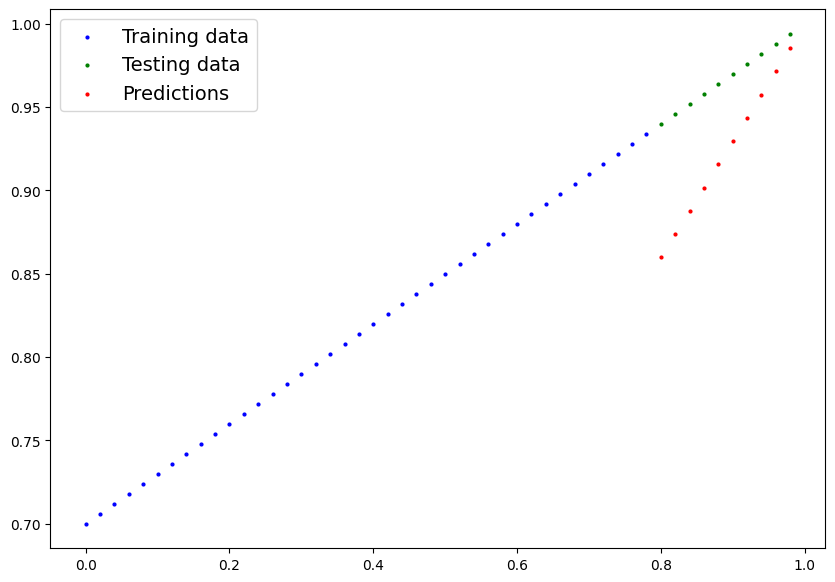

In [117]:
# Plot Predictions
plot_predictions(predictions=y_preds.cpu())

## Saving and Loading Trained Model

In [120]:
from pathlib import Path

# Create Model Directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# Create Model Save path
MODEL_NAME = '01_PyTorch_Model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model State_dict
print(f'Saving Model to: {MODEL_SAVE_PATH}')
torch.save(obj = model_1.state_dict(), f = MODEL_SAVE_PATH)

Saving Model to: models/01_PyTorch_Model_1.pth


In [121]:
# Load pytorch model

# Create a new instance of Linear Regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [122]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [123]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [124]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])